# 特異値分解を用いた低ランク近似の応用

モノクロの画像ファイルは2階のテンソル、つまり行列で書かれています。

したがって行列をより小さい行列で近似することは画像を圧縮することに対応します。

ここではカラーのブラックホールの画像をまずモノクロに変換し、そのあとそれを圧縮しています。

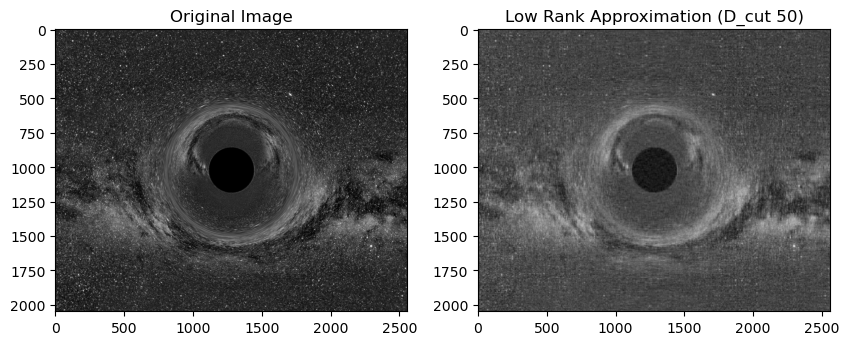

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd

# 画像を読み込む（例: 任意の画像ファイルを指定してください）
image = plt.imread("Black_Hole_Milkyway.jpg")

# 画像をグレースケールに変換（RGB画像の場合）
if len(image.shape) == 3:
    image = np.mean(image, axis=2)

# 特異値分解 (SVD)
U, S, Vt = svd(image)

# 低ランク近似のランクを指定
D_cut = 50  # 低ランク近似のランクを調整

# 低ランク近似を適用
compressed_image = np.dot(U[:, :D_cut], np.dot(np.diag(S[:D_cut]), Vt[:D_cut, :]))

# 画像の表示
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title(f'Low Rank Approximation (D_cut {D_cut})')
plt.imshow(compressed_image, cmap='gray')

plt.show()
